In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
from dataset import ASODataset
from graph_fn import single_graph_batch
from trainer import Trainer
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ExponentialLR
import torch
from torch_geometric.loader import DataLoader
from models import *

In [3]:
#hyperparameters
LEARNING_RATE = 7.5e-3
BATCH_SIZE = 16
NODE_INPUT_SIZE = 14
OUTPUT_SIZE_BEFORE_POOL = 20
NODE_HIDDEN_SIZE = 50
EPOCHS = 50
DROP_OUT = 0
BOND_ATTR = 5

In [4]:
a = ASODataset(single_graph_batch)
train_data, val_data = a.sample_test_data(19,2,2)
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

c:\Users\Haoyu Fan\Desktop\GNN\GNN_enantioselectivity\runs\..\ASOhelpers.py:133: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:204.)
  edge_attr = torch.tensor(edge_attr, dtype=torch.float)


In [5]:
device = torch.device('cuda')
model = GNNModel_sg_edge_attr(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, BOND_ATTR, num_layers=2, dp_rate=DROP_OUT)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = ExponentialLR(optimizer, gamma=0.95)

Epoch: 001, Train Loss: 0.5132, Test Loss: 0.5752, Train MAE: 0.1225, Test MAE: 0.1502, , Train R2: -0.0544, Test R2: -0.1778
Epoch: 002, Train Loss: 0.5066, Test Loss: 0.5599, Train MAE: 0.1239, Test MAE: 0.1460, , Train R2: 0.0341, Test R2: -0.0188
Epoch: 003, Train Loss: 0.5078, Test Loss: 0.5541, Train MAE: 0.1290, Test MAE: 0.1456, , Train R2: 0.0192, Test R2: 0.0525
Epoch: 004, Train Loss: 0.5056, Test Loss: 0.5583, Train MAE: 0.1209, Test MAE: 0.1434, , Train R2: 0.0464, Test R2: -0.0022
Epoch: 005, Train Loss: 0.5036, Test Loss: 0.5532, Train MAE: 0.1209, Test MAE: 0.1405, , Train R2: 0.0773, Test R2: 0.0578
Epoch: 006, Train Loss: 0.5022, Test Loss: 0.5506, Train MAE: 0.1195, Test MAE: 0.1382, , Train R2: 0.0988, Test R2: 0.0892
Epoch: 007, Train Loss: 0.5011, Test Loss: 0.5475, Train MAE: 0.1197, Test MAE: 0.1365, , Train R2: 0.1172, Test R2: 0.1285
Epoch: 008, Train Loss: 0.4993, Test Loss: 0.5433, Train MAE: 0.1190, Test MAE: 0.1333, , Train R2: 0.1508, Test R2: 0.1886
Epoc

array([0.44671717, 0.03425636, 0.90168955, 0.48063534, 0.03781119,
       0.91539251])

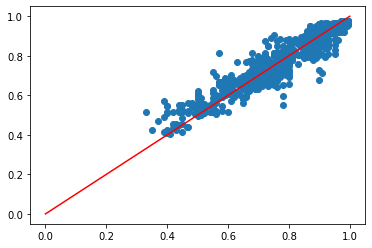

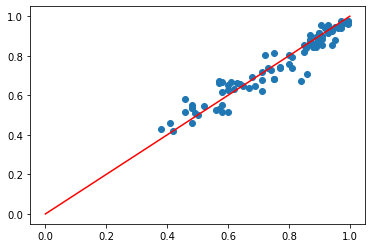

In [6]:
t = Trainer(model, device, optimizer, scheduler, glob_v= False)
t.train(train_loader, val_loader, nn.BCELoss, EPOCHS)